In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [3]:
files = ['cleaned_files/mortgage.csv','cleaned_files/immigration.csv','cleaned_files/house_price.csv']
dfs=[pd.read_csv(f,parse_dates=True)for f in files]

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_files/mortgage.csv'

In [ ]:
price_data =pd.merge(pd.merge(dfs[0],dfs[1],on='date'),dfs[2],on='date')
df = price_data.drop('Composite_HPI_SA', axis=1)

In [ ]:
df

,Mortgage_Rate,date,immigrants,Composite_Benchmark_SA
0,5.59,2005-02,18812.66667,222500
1,5.60,2005-03,18812.66667,224200
2,5.67,2005-04,24823.66667,225900
3,5.55,2005-05,24823.66667,227400
4,5.31,2005-06,24823.66667,229600
...,...,...,...,...
198,3.20,2021-08,40970.33333,721900
199,3.22,2021-09,40970.33333,738200
200,3.29,2021-10,46063.33333,759500
201,3.40,2021-11,46063.33333,777000


In [ ]:
df.dtypes

Mortgage_Rate             float64
date                       object
immigrants                float64
Composite_Benchmark_SA      int64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

Mortgage_Rate                    float64
date                      datetime64[ns]
immigrants                       float64
Composite_Benchmark_SA             int64
dtype: object

In [ ]:
df1=df[['date','Composite_Benchmark_SA']]
df1

,date,Composite_Benchmark_SA
0,2005-02-01,222500
1,2005-03-01,224200
2,2005-04-01,225900
3,2005-05-01,227400
4,2005-06-01,229600
...,...,...
198,2021-08-01,721900
199,2021-09-01,738200
200,2021-10-01,759500
201,2021-11-01,777000


In [ ]:
df1.columns = ['ds','y']
df1

,ds,y
0,2005-02-01,222500
1,2005-03-01,224200
2,2005-04-01,225900
3,2005-05-01,227400
4,2005-06-01,229600
...,...,...
198,2021-08-01,721900
199,2021-09-01,738200
200,2021-10-01,759500
201,2021-11-01,777000


In [ ]:
df1.tail()

,ds,y
198,2021-08-01,721900
199,2021-09-01,738200
200,2021-10-01,759500
201,2021-11-01,777000
202,2021-12-01,790400


<AxesSubplot:xlabel='ds'>

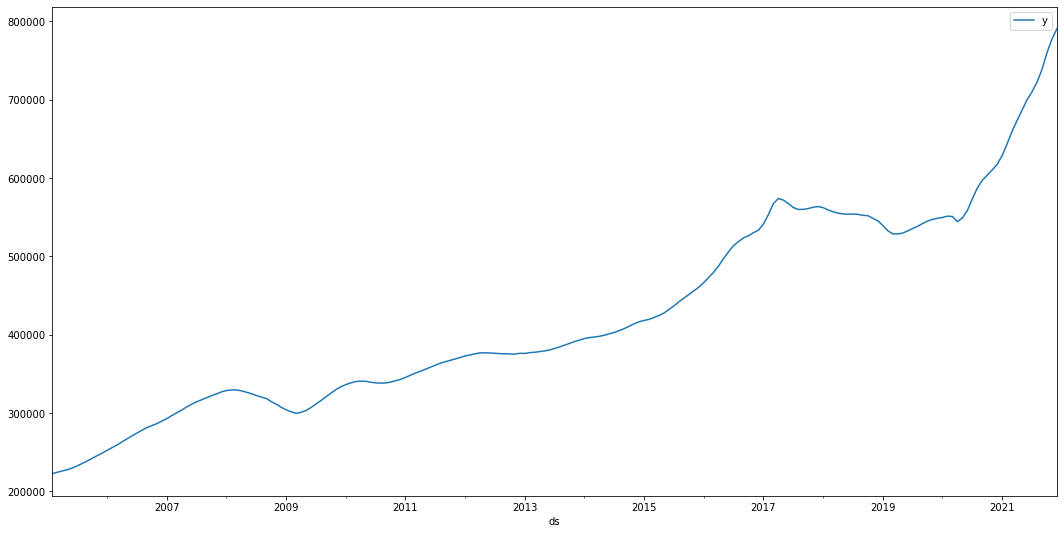

In [ ]:
df1.plot(x='ds',y='y',figsize=(18,9))

In [ ]:
len(df1)

203

In [ ]:
train= df1.iloc[:len(df)-50]
test = df1.iloc[len(df)-50:]
test.plot()

NameError: name 'df1' is not defined

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=51, freq='M')
forecast = m.predict(future)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-02-01,217502.026634,211158.813081,225141.434478,217502.026634,217502.026634,931.984741,931.984741,931.984741,931.984741,931.984741,931.984741,0.0,0.0,0.0,218434.011376
1,2005-03-01,220556.044529,215286.318726,229582.934980,220556.044529,220556.044529,1732.976536,1732.976536,1732.976536,1732.976536,1732.976536,1732.976536,0.0,0.0,0.0,222289.021065
2,2005-04-01,223937.278627,218905.684440,232834.158062,223937.278627,223937.278627,1700.874476,1700.874476,1700.874476,1700.874476,1700.874476,1700.874476,0.0,0.0,0.0,225638.153103
3,2005-05-01,227209.440657,221090.118015,235262.745222,227209.440657,227209.440657,1034.732999,1034.732999,1034.732999,1034.732999,1034.732999,1034.732999,0.0,0.0,0.0,228244.173655
4,2005-06-01,230590.674755,223467.473110,237913.731148,230590.674755,230590.674755,244.243054,244.243054,244.243054,244.243054,244.243054,244.243054,0.0,0.0,0.0,230834.917809


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
199,2021-08-31,834478.593635,769536.305206,903488.865878
200,2021-09-30,839992.964618,773429.527690,909534.626957
201,2021-10-31,844791.416960,775779.731675,916713.911027
202,2021-11-30,850768.707569,781538.637713,925978.407065
203,2021-12-31,858518.301139,786468.004214,935420.482783


In [ ]:
test.tail()

,ds,y
198,2021-08-01,721900
199,2021-09-01,738200
200,2021-10-01,759500
201,2021-11-01,777000
202,2021-12-01,790400


In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = forecast.loc[(forecast['ds'] <='2021-12-31') & (forecast['ds'] >= '2017-11-01')]['yhat']
predictions

154    594572.195929
155    602321.789499
156    607865.563266
157    613377.325931
158    617680.655702
159    622931.718620
160    628117.146321
161    632681.828728
162    637773.658738
163    642283.231116
164    648013.245790
165    652157.654105
166    658436.967513
167    666701.332018
168    671924.878731
169    677391.327251
170    681485.484690
171    686884.815449
172    692176.304354
173    696733.590067
174    701881.060938
175    706283.529724
176    712222.558440
177    715717.367250
178    722313.586661
179    731085.084150
180    735980.047408
181    741529.472224
182    746262.798326
183    751233.886140
184    756204.798023
185    760779.464103
186    765753.365541
187    770476.674654
188    775768.793319
189    781225.120610
190    786915.631830
191    794143.399799
192    799998.814752
193    805554.395454
194    810070.856640
195    815179.122999
196    820257.637961
197    824828.094257
198    829862.053595
199    834478.593635
200    839992.964618
201    844791

In [ ]:
mse = mean_squared_error(predictions,test['y'])
r2 = r2_score(predictions,test['y'])
print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 20543844094.0831
R-squared (R2): -2.4752505685027577
